# importo file training

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
run = 1
a = np.loadtxt(f'runs/{run}/training.dat')
print(len(a)/31)
mpl.rcParams.update({'font.size': 14})
# 0 iter
# 1 d_loss_tot
# 2 d_loss_true
# 3 d_loss_fake
# 4 d_loss_gp
# 5 d_loss_tot_test
# 6 d_loss_true_test
# 7 d_loss_fake_test
# 8 d_loss_gp_test
# 9 g_loss

3059.967741935484


# plotto d_loss_training - d_loss_test

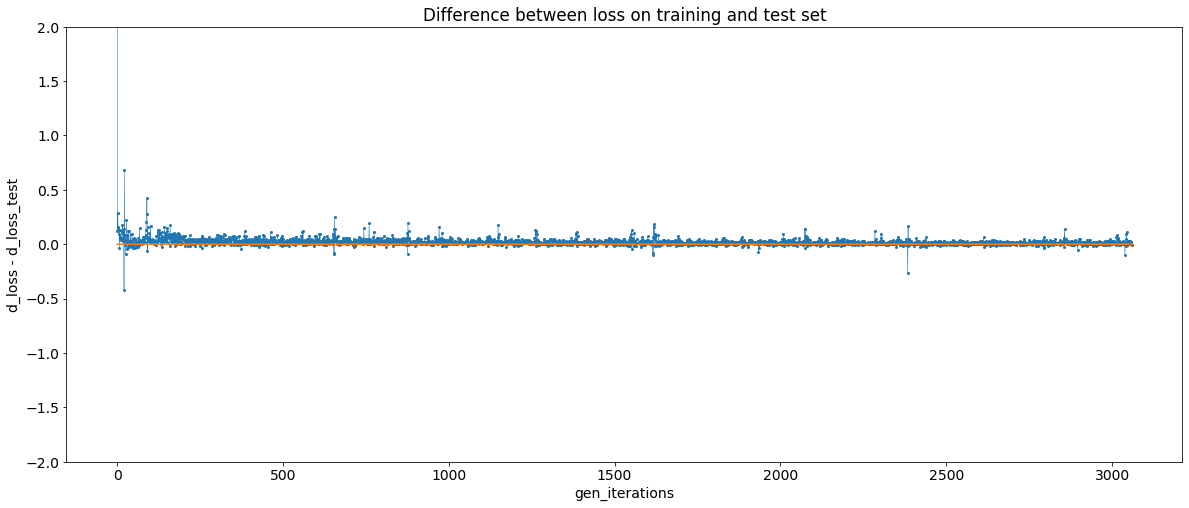

In [23]:
plt.figure(figsize=(20,8))
every = 31*1
#plt.scatter(a[np.arange(0,a.shape[0],every),0], a[np.arange(0,a.shape[0],every),1], label='d_loss', s=ms)
#plt.scatter(a[np.arange(0,a.shape[0],every),0], a[np.arange(0,a.shape[0],every),5], label='d_loss_test', s=ms)
# d_loss_traing - d_loss_test
plt.plot(a[np.arange(0,a.shape[0],every),0], a[np.arange(0,a.shape[0],every),1]-a[np.arange(0,a.shape[0],every),5], label='difference', lw=0.5, marker='.', ms=4)
plt.plot(a[np.arange(0,a.shape[0],every),0], [0.]*len(a[np.arange(0,a.shape[0],every),0]))
plt.ylim([-2,2])
plt.ylabel('d_loss - d_loss_test')
plt.xlabel('gen_iterations')
plt.title('Difference between loss on training and test set')
plt.show()

# plotto d_loss_true, d_loss_fake, d_loss_gp*10

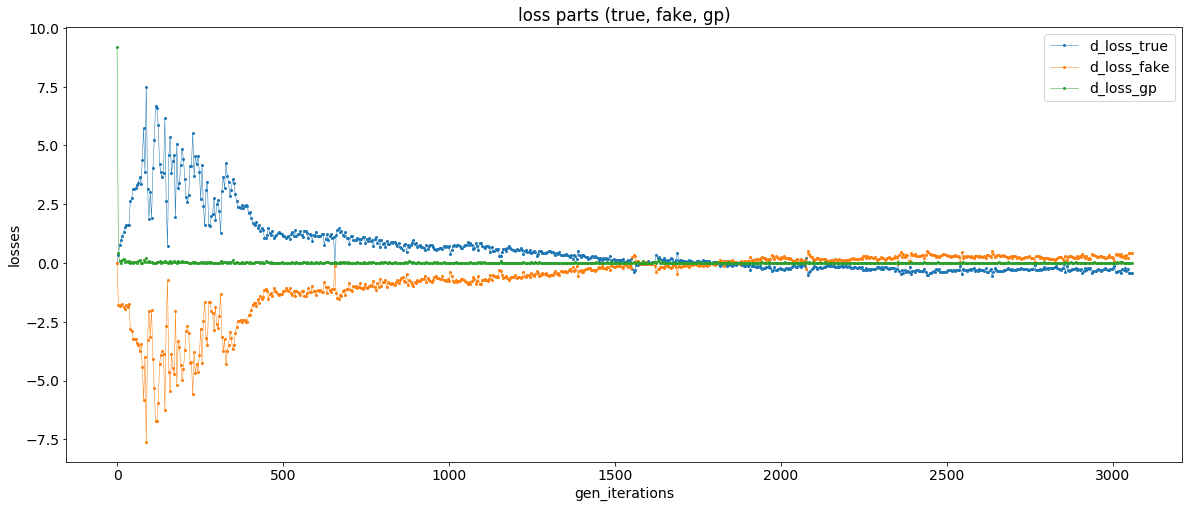

In [24]:
plt.figure(figsize=(20,8))
every = 31*4
ms = 2
plt.plot(a[0:a.shape[0]:every,0], a[0:a.shape[0]:every,2], label='d_loss_true', lw=0.5, marker='.', ms=4)
plt.plot(a[0:a.shape[0]:every,0], a[0:a.shape[0]:every,3], label='d_loss_fake', lw=0.5, marker='.', ms=4)
plt.plot(a[0:a.shape[0]:every,0], 10*a[0:a.shape[0]:every,4], label='d_loss_gp', lw=0.5, marker='.', ms=4)
#plt.ylim([-2,2])
plt.ylabel('losses')
plt.xlabel('gen_iterations')
plt.title('loss parts (true, fake, gp)')
plt.legend()
plt.show()

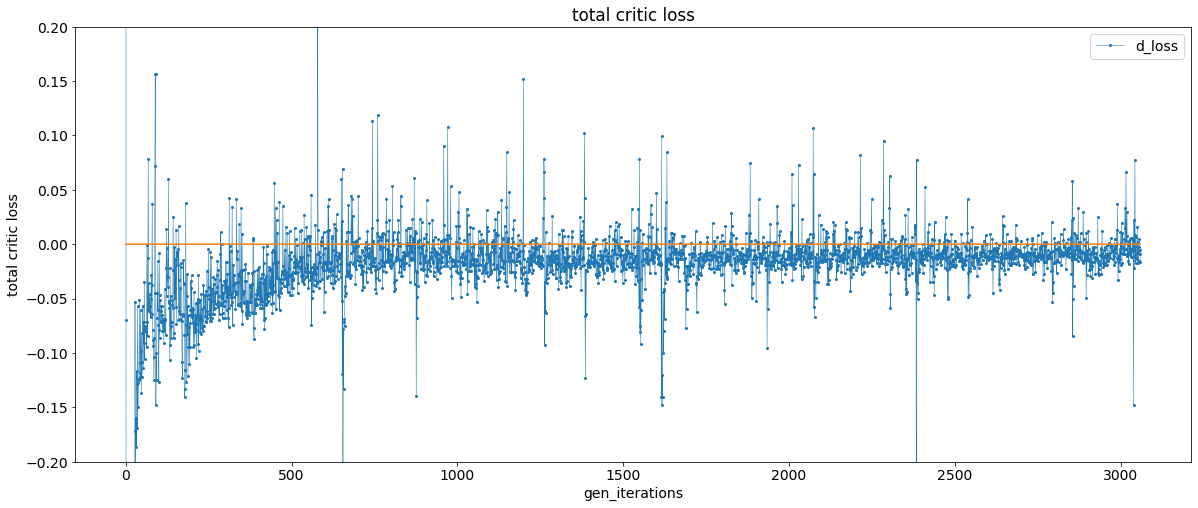

In [27]:
plt.figure(figsize=(20,8))
every = 31*1
plt.plot(a[np.arange(0,a.shape[0],every),0], a[np.arange(0,a.shape[0],every),1], label='d_loss', lw=0.5, marker='.', ms=4)
plt.plot(a[np.arange(0,a.shape[0],every),0], [0.]*len(a[np.arange(0,a.shape[0],every),0]))
plt.ylim([-0.2,0.2])
plt.ylabel('total critic loss')
plt.xlabel('gen_iterations')
plt.title('total critic loss')
plt.legend()
plt.show()

# plotto d_loss tra una iterazione del generatore e l'altra

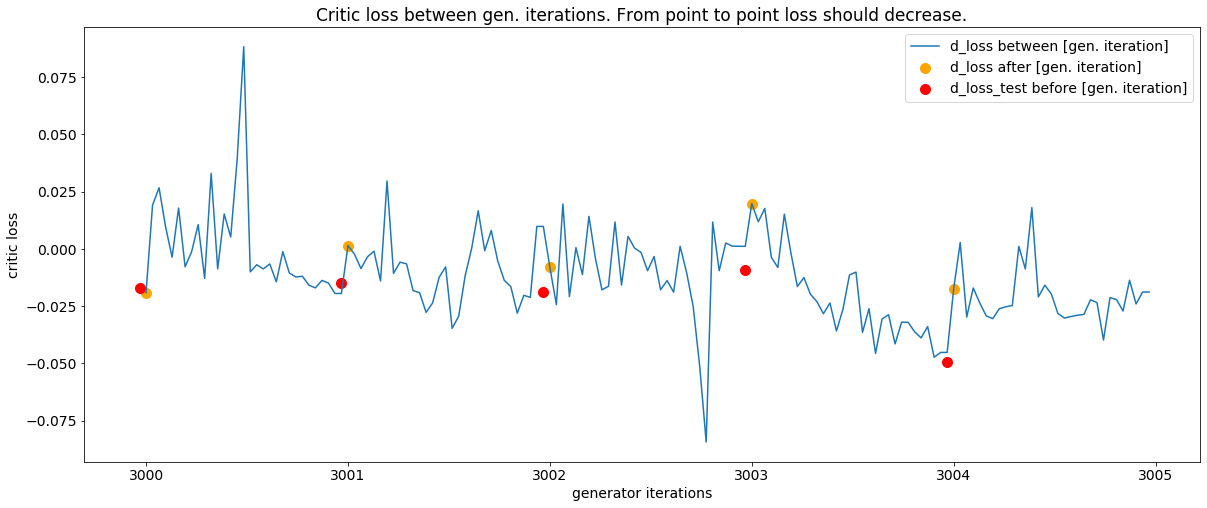

In [26]:
plt.figure(figsize=(20,8))
every = 31
start_gen_iter = 3000
start = (start_gen_iter)*every
end = (start_gen_iter+5)*every
ms = 2
plt.plot(np.arange(start//every,end//every,1./every), a[start:end,1], label='d_loss between [gen. iteration]')
plt.scatter(a[start:end:every,0], a[start:end:every,1], s=100, color='orange', label='d_loss after [gen. iteration]')
plt.scatter(a[start:end:every,0]-1./every, a[start:end:every,5], s=100, color='red', label='d_loss_test before [gen. iteration]')
plt.legend()
plt.xlabel('generator iterations')
plt.ylabel('critic loss')
plt.title('Critic loss between gen. iterations. From point to point loss should decrease.',fontsize=17)
plt.savefig(f'../plots/training_run_{run}',dpi=100,fmt='png')
plt.show()